In [1]:
# import packages
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time_series_helper
import mlflow
import keras

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
TRAIN_FILE_PATH = os.path.join(os.getcwd(),"datasets","cases_malaysia_train.csv")
TEST_FILE_PATH = os.path.join(os.getcwd(),"datasets","cases_malaysia_test.csv")
df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

## MAIN DF

In [3]:
print(df.head())

        date cases_new  cases_import  cases_recovered  cases_active  \
0  25/1/2020         4             4                0             4   
1  26/1/2020         0             0                0             4   
2  27/1/2020         0             0                0             4   
3  28/1/2020         0             0                0             4   
4  29/1/2020         3             3                0             7   

   cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0              0            4           0           0            0  ...   
1              0            0           0           0            0  ...   
2              0            0           0           0            0  ...   
3              0            0           0           0            0  ...   
4              0            3           0           0            0  ...   

   cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
0            0            0         0         

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     680 non-null    object 
 1   cases_new                680 non-null    object 
 2   cases_import             680 non-null    int64  
 3   cases_recovered          680 non-null    int64  
 4   cases_active             680 non-null    int64  
 5   cases_cluster            680 non-null    int64  
 6   cases_unvax              680 non-null    int64  
 7   cases_pvax               680 non-null    int64  
 8   cases_fvax               680 non-null    int64  
 9   cases_boost              680 non-null    int64  
 10  cases_child              680 non-null    int64  
 11  cases_adolescent         680 non-null    int64  
 12  cases_adult              680 non-null    int64  
 13  cases_elderly            680 non-null    int64  
 14  cases_0_4                6

In [5]:
print("Rows:",df.shape[0],"Columns:",df.shape[1])

Rows: 680 Columns: 31


In [6]:
# Convert object to float
df['cases_new'] = df['cases_new'].str.replace(' ', '').apply(pd.to_numeric, errors='coerce')

In [7]:
print(df.isna().sum())

date                         0
cases_new                   12
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64


In [8]:
# Extract and convert the date time column
date_time = pd.to_datetime(df.pop('date'), format='mixed')
print(date_time.dtypes)
print(df.info())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                668 non-null    float64
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11 

In [9]:
df = df.fillna(0)

In [10]:
print(df.isna().sum())

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [11]:
print(df.duplicated().sum())

10


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,680.0,3830.579412,5627.107772,0.0,38.00,1301.0,5414.50,24599.0
cases_import,680.0,8.788235,9.162540,0.0,3.00,6.0,12.00,72.0
cases_recovered,680.0,3766.514706,5622.296192,0.0,46.50,1201.5,5173.50,24855.0
cases_active,680.0,45733.016176,67888.984001,1.0,1158.25,14371.0,64899.25,263845.0
cases_cluster,680.0,717.130882,827.327827,0.0,13.00,417.5,1117.75,3394.0
cases_unvax,680.0,2452.023529,3191.392812,0.0,46.50,1257.5,3462.50,12684.0
cases_pvax,680.0,578.805882,1532.323940,0.0,0.00,0.0,118.25,7313.0
cases_fvax,680.0,868.045588,1877.386774,0.0,0.00,0.0,116.50,8456.0
cases_boost,680.0,4.763235,21.433285,0.0,0.00,0.0,0.00,170.0
cases_child,680.0,519.935294,831.685231,0.0,2.00,109.0,754.25,3437.0


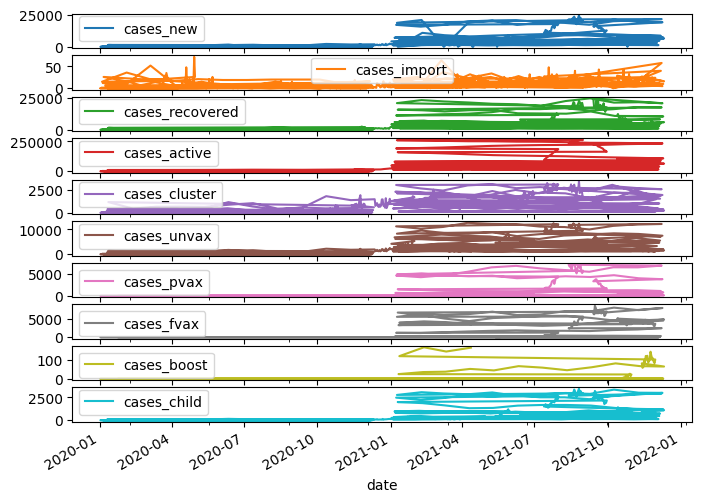

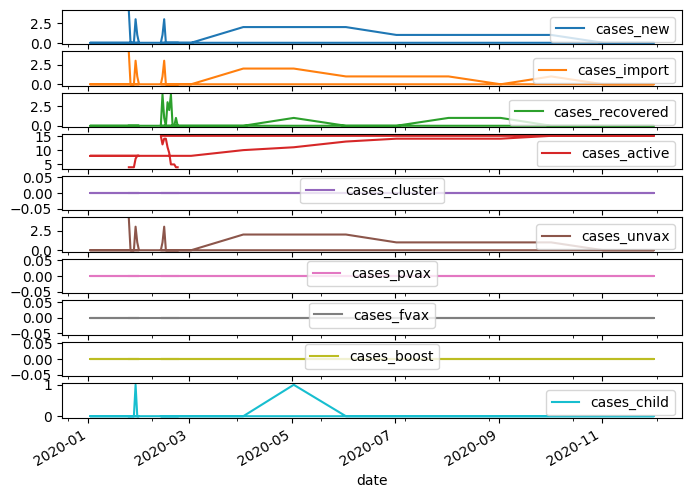

In [13]:
# Data inspection
plot_cols_10 = df.columns[0:10]
plot_features = df[plot_cols_10]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols_10][:30]
plot_features.index = date_time[:30]
_ = plot_features.plot(subplots=True)

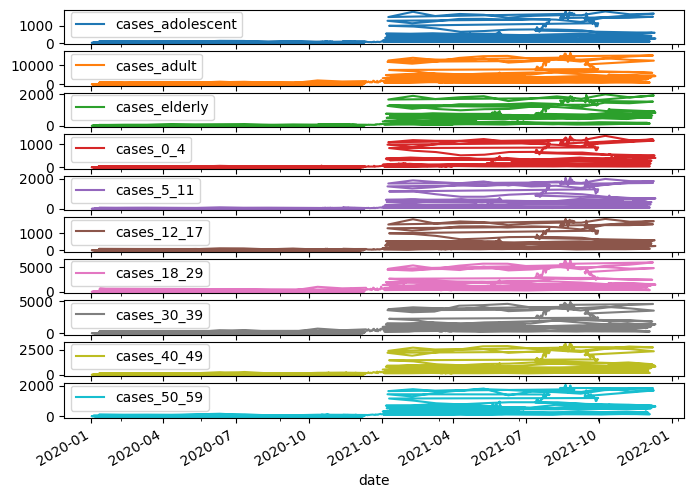

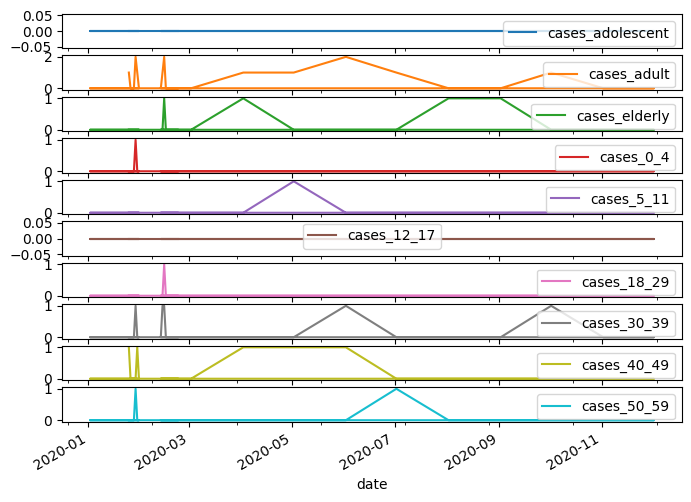

In [14]:
# Data inspection
plot_cols_20 = df.columns[10:20]
plot_features = df[plot_cols_20]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols_20][:30]
plot_features.index = date_time[:30]
_ = plot_features.plot(subplots=True)

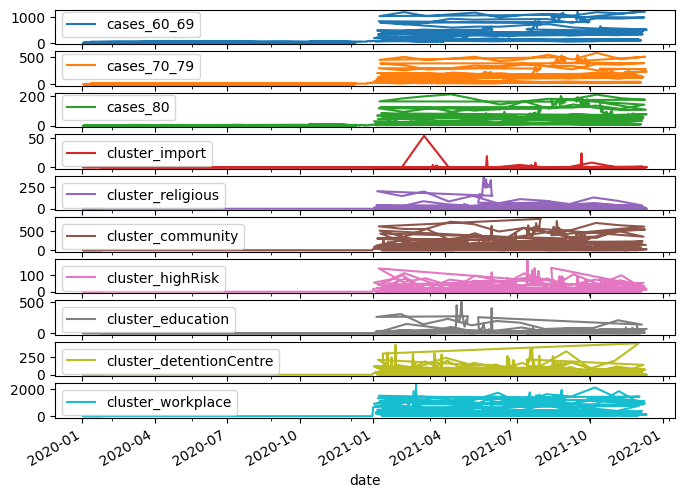

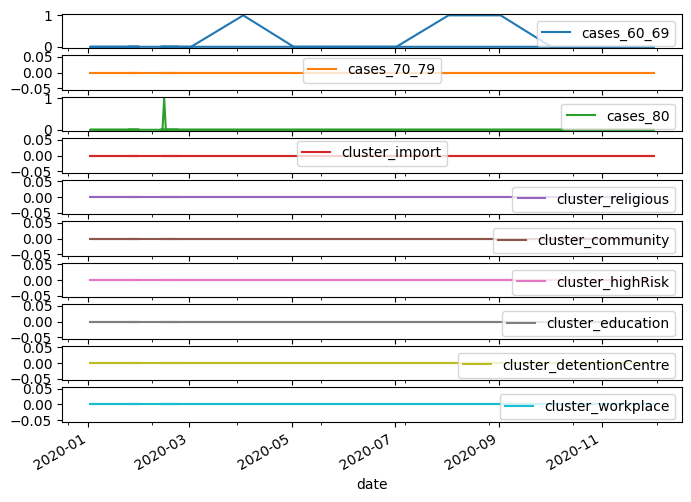

In [15]:
# Data inspection
plot_cols = df.columns[20:]
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:30]
plot_features.index = date_time[:30]
_ = plot_features.plot(subplots=True)

In [16]:
print(test_df.head())

        date  cases_new  cases_import  cases_recovered  cases_active  \
0  5/12/2021     4298.0            23             4928         61813   
1  6/12/2021     4262.0            15             5894         60139   
2  7/12/2021     4965.0            29             4817         60251   
3  8/12/2021     5020.0            17             4525         60709   
4  9/12/2021     5446.0            20             5427         60700   

   cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0            136         1017          38        3093          150  ...   
1             97         1036          39        3056          131  ...   
2            138         1130          46        3642          147  ...   
3            154         1162          41        3674          143  ...   
4            367         1207          53        4034          152  ...   

   cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
0          330          130        49   

In [17]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     100 non-null    object 
 1   cases_new                99 non-null     float64
 2   cases_import             100 non-null    int64  
 3   cases_recovered          100 non-null    int64  
 4   cases_active             100 non-null    int64  
 5   cases_cluster            100 non-null    int64  
 6   cases_unvax              100 non-null    int64  
 7   cases_pvax               100 non-null    int64  
 8   cases_fvax               100 non-null    int64  
 9   cases_boost              100 non-null    int64  
 10  cases_child              100 non-null    int64  
 11  cases_adolescent         100 non-null    int64  
 12  cases_adult              100 non-null    int64  
 13  cases_elderly            100 non-null    int64  
 14  cases_0_4                10

In [18]:
print("Rows:",test_df.shape[0],"Columns:",test_df.shape[1])

Rows: 100 Columns: 31


In [19]:
print(test_df.isna().sum())

date                       0
cases_new                  1
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [20]:
test_df = test_df.fillna(0)
print(test_df.isna().sum())

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64


In [21]:
print(test_df.duplicated().sum())

0


In [22]:
# Extract and convert the date time column
date_time_test = pd.to_datetime(test_df.pop('date'), format='mixed')
print(date_time_test.dtypes)
print(test_df.info())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                100 non-null    float64
 1   cases_import             100 non-null    int64  
 2   cases_recovered          100 non-null    int64  
 3   cases_active             100 non-null    int64  
 4   cases_cluster            100 non-null    int64  
 5   cases_unvax              100 non-null    int64  
 6   cases_pvax               100 non-null    int64  
 7   cases_fvax               100 non-null    int64  
 8   cases_boost              100 non-null    int64  
 9   cases_child              100 non-null    int64  
 10  cases_adolescent         100 non-null    int64  
 11  cases_adult              100 non-null    int64  
 12  cases_elderly            100 non-null    int64  
 13  cases_0_4                100 non-null    int64  
 14  cases_5_11  

In [23]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,100.0,11854.07,11099.243041,0.0,3384.75,4759.0,22876.50,33406.0
cases_import,100.0,224.99,153.883105,14.0,94.75,218.5,334.25,608.0
cases_recovered,100.0,9415.30,9226.279561,2584.0,3398.50,4753.5,11930.00,33872.0
cases_active,100.0,120021.37,106310.747283,39615.0,42808.25,57657.5,221429.25,323618.0
cases_cluster,100.0,320.79,225.743678,33.0,131.75,279.0,483.25,1019.0
cases_unvax,100.0,2087.39,1717.484212,489.0,740.75,1031.5,3846.75,5649.0
cases_pvax,100.0,142.73,207.250293,11.0,19.00,30.5,175.25,773.0
cases_fvax,100.0,5294.58,3781.993457,1573.0,2363.50,3097.0,9119.00,13079.0
cases_boost,100.0,4386.57,5682.907255,96.0,252.00,695.0,9553.25,18123.0
cases_child,100.0,1584.26,1387.877251,349.0,492.75,735.5,3021.75,4389.0


In [24]:
# Data normalization
train_df = df
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [25]:
# Test out the window class code
test_window = time_series_helper.WindowGenerator(input_width=30,label_width=1,shift=1,train_df=train_df,val_df=None,test_df=test_df,label_columns=['cases_new'])
print(test_window)

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): ['cases_new']


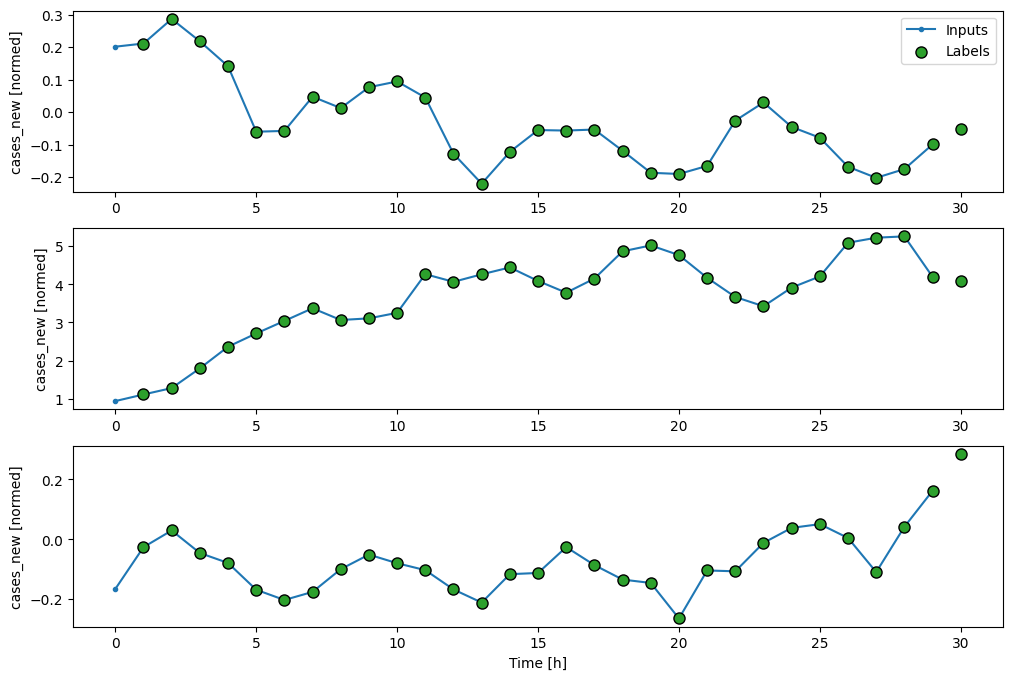

In [26]:
# Create a window for single-time-step single-output prediction
wide_window = time_series_helper.WindowGenerator(30,30,1,train_df=train_df,val_df=None,test_df=test_df,label_columns=["cases_new"])
wide_window.plot(plot_col="cases_new")

In [27]:
# Create an RNN (LSTM) for the wide window
model_single_step = keras.Sequential()
model_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))
model_single_step.add(keras.layers.LSTM(units=128,return_sequences=True)) 
model_single_step.add(keras.layers.LSTM(units=64,return_sequences=True)) 
model_single_step.add(keras.layers.Dense(units=1))
model_single_step.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Set the experiment
mlflow.set_experiment('Covid19 Prediction')

<Experiment: artifact_location='file:///c:/Users/suhaimi/Desktop/YPAI11/Capstone/capstone1_afiq/mlruns/827533257361748257', creation_time=1741580784059, experiment_id='827533257361748257', last_update_time=1741580784059, lifecycle_stage='active', name='Covid19 Prediction', tags={}>

In [29]:
# Compile and train
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_single_step.compile(optimizer=optimizer,loss='mse',metrics=["mae"])

In [30]:
# Train the model
# Run experiments
with mlflow.start_run() as run:
    mlflow_c = mlflow.keras.MlflowCallback(run)
    history_single = model_single_step.fit(wide_window.train,validation_data=None,epochs=80,batch_size=32,callbacks=[mlflow_c])
    mlflow.keras.save.log_model(model_single_step, artifact_path='model')

Epoch 1/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5052 - mae: 0.4567
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1759 - mae: 0.2319
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1113 - mae: 0.1677
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0857 - mae: 0.1446
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0793 - mae: 0.1338
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0698 - mae: 0.1263
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0623 - mae: 0.1191
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0539 - mae: 0.1145
Epoch 9/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0604 - mae: 0.1160
Epoch 10/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0461 - mae: 0.1043
Epoch 11/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0485 - mae: 0.1053
Epoch 12/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0467 - mae: 0.1016
Epoch 13/80
21/21 ━━━━━━━━━━━━━━━━━━━

2025/03/10 14:25:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/10 14:25:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


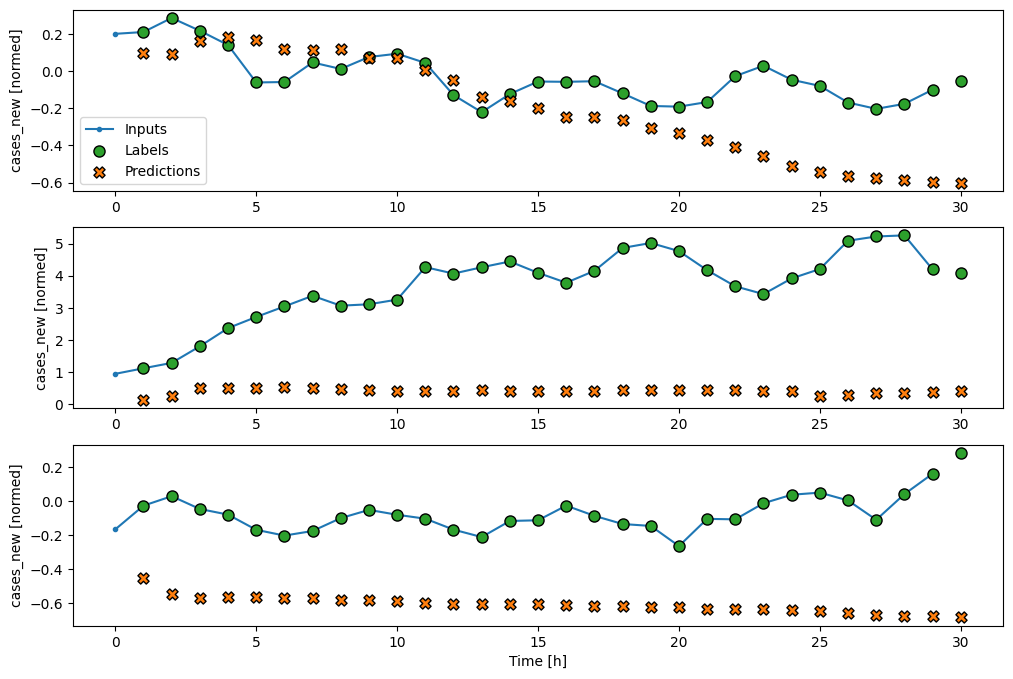

In [31]:
# Show example prediction for predict new covid cases
wide_window.plot(model=model_single_step,plot_col="cases_new")